In [1]:
# Import Dependencies
import pandas as pd
import sklearn.preprocessing as skl
import matplotlib.pyplot as plt
from statsmodels import tsa
import numpy as np

In [3]:
# Read in the csv 
sales_df = pd.read_csv("Resources/Walmart.csv")
sales_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
sales_df.groupby('Holiday_Flag').mean()['Weekly_Sales']

/var/folders/31/0zrggm_d0dx3plbvqmkym84m0000gn/T/ipykernel_59437/2122525807.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_df.groupby('Holiday_Flag').mean()['Weekly_Sales']


Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

In [5]:
sales_df[sales_df['Holiday_Flag']==1]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,10-09-2010,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,31-12-2010,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...,...
6375,45,09-09-2011,746129.56,1,71.48,3.738,186.673738,8.625
6386,45,25-11-2011,1170672.94,1,48.71,3.492,188.350400,8.523
6391,45,30-12-2011,869403.63,1,37.79,3.389,189.062016,8.523
6397,45,10-02-2012,803657.12,1,37.00,3.640,189.707605,8.424


In [6]:
# Will drop Holiday Flag since it has not clear indicator in sales increase of decrease

In [7]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'],format = '%d-%m-%Y')

In [8]:
sales_group = sales_df.groupby('Date')
agg_sales_df = pd.DataFrame(sales_group.sum()['Weekly_Sales'])
agg_sales_df['Fuel_Price'] = sales_group.mean()['Fuel_Price']
agg_sales_df['CPI'] = sales_group.mean()['CPI']
agg_sales_df['Temperature'] = sales_group.mean()['Temperature']
agg_sales_df

,Weekly_Sales,Fuel_Price,CPI,Temperature
Date,,,,
2010-02-05,49750740.50,2.717844,167.730885,34.037333
2010-02-12,48336677.63,2.694022,167.825608,34.151333
2010-02-19,48276993.78,2.672067,167.871686,37.719778
2010-02-26,43968571.13,2.683933,167.909657,39.243556
2010-03-05,46871470.30,2.731200,167.947628,42.917333
...,...,...,...,...
2012-09-28,43734899.40,3.854578,176.373588,68.754444
2012-10-05,47566639.31,3.845222,176.505052,65.973111
2012-10-12,46128514.25,3.896733,176.636515,58.342667


In [9]:
sales_df.groupby('Store').count()['Weekly_Sales']

Store
1     143
2     143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
22    143
23    143
24    143
25    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
45    143
Name: Weekly_Sales, dtype: int64

(array([14610., 14730., 14853., 14975., 15095., 15218., 15340., 15461.,
        15584.]),
 [Text(14610.0, 0, '2010-01'),
  Text(14730.0, 0, '2010-05'),
  Text(14853.0, 0, '2010-09'),
  Text(14975.0, 0, '2011-01'),
  Text(15095.0, 0, '2011-05'),
  Text(15218.0, 0, '2011-09'),
  Text(15340.0, 0, '2012-01'),
  Text(15461.0, 0, '2012-05'),
  Text(15584.0, 0, '2012-09')])

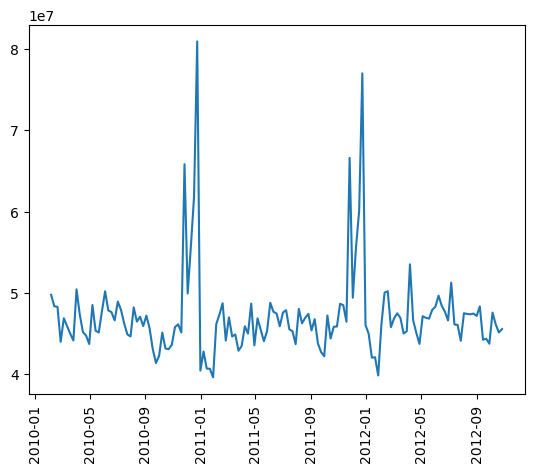

In [10]:
plt.plot(agg_sales_df.index,agg_sales_df['Weekly_Sales'])
plt.xticks(rotation = 90)

(array([14730., 14853., 14975., 15095., 15218., 15340., 15461., 15584.]),
 [Text(14730.0, 0, '2010-05'),
  Text(14853.0, 0, '2010-09'),
  Text(14975.0, 0, '2011-01'),
  Text(15095.0, 0, '2011-05'),
  Text(15218.0, 0, '2011-09'),
  Text(15340.0, 0, '2012-01'),
  Text(15461.0, 0, '2012-05'),
  Text(15584.0, 0, '2012-09')])

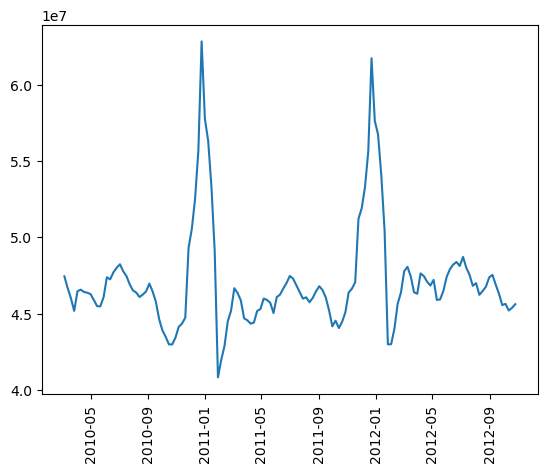

In [11]:
ma_sales_df = agg_sales_df['Weekly_Sales'].rolling(5).mean().iloc[4:]
ma_sales_df
plt.plot(ma_sales_df)
plt.xticks(rotation = 90)


(array([14610., 14730., 14853., 14975., 15095., 15218., 15340., 15461.,
        15584.]),
 [Text(14610.0, 0, '2010-01'),
  Text(14730.0, 0, '2010-05'),
  Text(14853.0, 0, '2010-09'),
  Text(14975.0, 0, '2011-01'),
  Text(15095.0, 0, '2011-05'),
  Text(15218.0, 0, '2011-09'),
  Text(15340.0, 0, '2012-01'),
  Text(15461.0, 0, '2012-05'),
  Text(15584.0, 0, '2012-09')])

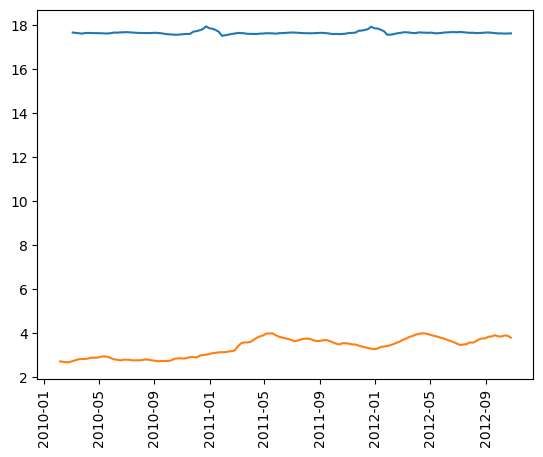

In [17]:
scaled_sales = np.log(np.array(ma_sales_df))
plt.plot(ma_sales_df.index,scaled_sales)

plt.plot(agg_sales_df.index,agg_sales_df['Fuel_Price'])

plt.xticks(rotation = 90)

# Preprocessing

In [ ]:
# Use Preprocessing methods

In [ ]:
# Get our target and features arrays

In [ ]:
# Split into testing and training set

# First XGBOOST Model

In [ ]:
# Create the first XGBoost Model

In [ ]:
# Calculate Accuracy

# Optimizing the Model

In [ ]:
# Optimize the model by dropping colums from the dataframe, etc and calculate accuracy again

# Optimize model one more time (If haven't reached 75% accuracy)

In [ ]:
# If accuracy is still not at 75% or higher, optimize the model one more time and calculate accuracy